## Importing Data Notebook

Code sources:
- https://github.com/dlab-berkeley/Geospatial-Fundamentals-in-Python/blob/master/Geopandas_Intro_F2019_GC.ipynb
- https://rasterio.readthedocs.io/en/stable/

### Working with Geopandas (Mac)

Geopandas works for vector data. For raster data, use rasterio (see next section).

First, install Homebrew so that the `!brew install spatialindex` command  works. `spatialindex` is a dependency of `rtree`, which is a dependency of `geopandas`. To install Homebrew open a new Terminal window and enter the following command:

`!ruby -e "$(curl -fsSL https://raw.githubusercontent.com/Homebrew/install/master/install)" < /dev/null 2> /dev/null`

When it prompts for your password, type in your computer's password and press Enter. Your password won't show up typed onto the screen but is still being entered.

Install libraries:

In [1]:
### Install pysal
!pip install pysal
# Install mapclassify
!pip install mapclassify

# Install Geopandas dependencies
!pip install fiona 
!pip install shapely 
!pip install pyproj 
!brew install spatialindex # dependency of rtree
!pip install rtree

# Install Geopandas
!pip install geopandas
# Install descartes - Geopandas requirement
!pip install descartes

'brew' is not recognized as an internal or external command,
operable program or batch file.


Geopandas can also be installed directly from github. This still requires installing geopandas dependencies separately (`pandas fiona shapely pyproj rtree`)

To install directly from github: `!pip install git+git://github.com/geopandas/geopandas.git`

Import libraries:

In [22]:
# geopandas dependencies
import pandas as pd
import fiona 
import shapely
import pyproj
import rtree

import geopandas as gpd
import mapclassify
import matplotlib.pyplot as plt
from shapely.geometry import Point
from matplotlib import pyplot

Fetch data files with `wget`

In [3]:
!pip install wget
import wget

  Stored in directory: C:\Users\theaa\AppData\Local\pip\Cache\wheels\40\15\30\7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [4]:
prefix = 'https://github.com/AaronScherf/Human_Mobility_Project/blob/master/data/raw_data/TravelTime_50k.zip'
wget.download(prefix+'us_states.zip')
wget.download(prefix+'uscounties_1810.zip')
wget.download(prefix+'orleans_census_data1810.csv')
wget.download(prefix+'lsc_points.csv')
wget.download(prefix+'orleans_places.csv')

'orleans_places.csv'

Save the files as an object list `myfiles`

In [10]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 0E6D-AB00

 Directory of C:\Users\theaa\Desktop\Data Science Pedagogy Resources\Python\Human_Mobility_Project\Human_Mobility_Project\code\1_importing

11/12/2019  11:34 AM    <DIR>          .
11/12/2019  11:34 AM    <DIR>          ..
11/12/2019  11:30 AM             6,148 .DS_Store
11/12/2019  11:30 AM    <DIR>          .ipynb_checkpoints
11/12/2019  11:33 AM           100,438 importing_data.ipynb
11/12/2019  11:34 AM               183 lsc_points.csv
11/12/2019  11:34 AM             1,408 orleans_census_data1810.csv
11/12/2019  11:34 AM             2,900 orleans_places.csv
11/12/2019  11:34 AM         3,287,089 us_states.zip
11/12/2019  11:34 AM         2,733,747 uscounties_1810.zip
               7 File(s)      6,131,913 bytes
               3 Dir(s)  353,947,369,472 bytes free


In [11]:
myfiles = ls *.zip
print(myfiles)

SyntaxError: invalid syntax (<ipython-input-11-7b858e1ed472>, line 1)

Unzip the data files

In [8]:
for f in myfiles:
  print("Unzipping: ", f)
  !unzip {f}

Unzipping:  us_states.zip
Archive:  us_states.zip
  inflating: us_states.dbf           
  inflating: us_states.prj           
  inflating: us_states.shp           
  inflating: us_states.shx           
Unzipping:  uscounties_1810.zip
Archive:  uscounties_1810.zip
  inflating: uscounties_1810.dbf     
  inflating: uscounties_1810.prj     
  inflating: uscounties_1810.shp     
  inflating: uscounties_1810.shx     


Read in country borders shapefile

In [9]:
usa1810 = gpd.read_file("./uscounties_1810.shp")  #US counties in 1810

Map out borders

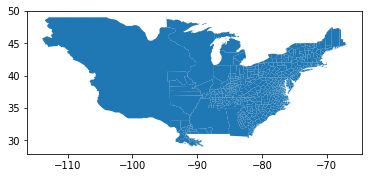

In [10]:
usa1810.plot()  # it's really that simple!

### Working with raster data

References: 
- https://rasterio.readthedocs.io/en/stable/
- https://rasterio.readthedocs.io/en/stable/quickstart.html#reading-raster-data

Note that geopandas only works for vector data.

In [12]:
!pip install rasterio

  Using cached https://files.pythonhosted.org/packages/1a/6d/ee8b15e0d45dd7e9e7f2559e37f91915a19155cf8403948ff2082903ee30/rasterio-1.1.0.tar.gz
  Installing build dependencies: started
  Installing build dependencies: finished with status 'error'
  Complete output from command C:\Users\theaa\AppData\Local\Continuum\anaconda3\python.exe C:\Users\theaa\AppData\Local\Continuum\anaconda3\lib\site-packages\pip install --ignore-installed --no-user --prefix C:\Users\theaa\AppData\Local\Temp\pip-build-env-f62ywdfm\overlay --no-warn-script-location --no-binary :none: --only-binary :none: -i https://pypi.org/simple -- setuptools wheel cython numpy:
  Traceback (most recent call last):
    File "C:\Users\theaa\AppData\Local\Continuum\anaconda3\lib\runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "C:\Users\theaa\AppData\Local\Continuum\anaconda3\lib\runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "C:\Users\theaa\AppData\Local\Continuum\anacon

Command "C:\Users\theaa\AppData\Local\Continuum\anaconda3\python.exe C:\Users\theaa\AppData\Local\Continuum\anaconda3\lib\site-packages\pip install --ignore-installed --no-user --prefix C:\Users\theaa\AppData\Local\Temp\pip-build-env-f62ywdfm\overlay --no-warn-script-location --no-binary :none: --only-binary :none: -i https://pypi.org/simple -- setuptools wheel cython numpy" failed with error code 1 in None


In [13]:
conda config --add channels conda-forge


Note: you may need to restart the kernel to use updated packages.


In [14]:
conda install rasterio

Solving environment: ...working... 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/win-64::anaconda==2019.03=py37_0
  - defaults/win-64::numba==0.43.1=py37hf9181ef_0
done

## Package Plan ##

  environment location: C:\Users\theaa\AppData\Local\Continuum\anaconda3

  added / updated specs:
    - rasterio


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _anaconda_depends-2019.03  |           py37_0           5 KB
    affine-2.3.0               |             py_0          16 KB  conda-forge
    anaconda-custom            |           py37_1           2 KB
    ca-certificates-2019.9.11  |       hecc5488_0         181 KB  conda-forge
    certifi-2019.9.11          |           py37_0         147 KB  conda-forge
    openssl-1.1.1d             |       hfa6e2cd_0         4.7 MB  conda-forge
    rasterio

In [15]:
import rasterio
import rasterio.features
import rasterio.warp

## Step 1: Import our data

In [16]:
data_folder = '../../data/raw_data/'

Import the shapefile for country borders. Steps needed:
1. Import shapefile (done)
2. Change the bounds to only include southern Africa (to do)

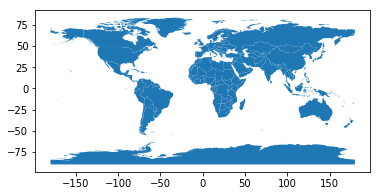

In [17]:
# read in borders shapefile
country_borders = gpd.read_file(data_folder+
                                'World Country Borders/ne_50m_admin_0_countries.shp') 
# visualize country borders
country_borders.plot()

Read in the data for variables to use in the principal component analysis.

In [18]:
# travel time to nearest city with population of at least 50,000
dataset = rasterio.open(data_folder+'TravelTime_50k/Traveltime_50k.tif')

Next step: use dataset.transform to map pixel locations. See https://rasterio.readthedocs.io/en/stable/quickstart.html#reading-raster-data

In [19]:

with rasterio.open(data_folder+'TravelTime_50k/Traveltime_50k.tif') as data_set:

    # Read the dataset's valid data mask as a ndarray.
    mask = data_set.dataset_mask()

    # Extract feature shapes and values from the array.
    for geom, val in rasterio.features.shapes(
            mask, transform=data_set.transform):

        # Transform shapes from the dataset's own coordinate
        # reference system to CRS84 (EPSG:4326).
        geom = rasterio.warp.transform_geom(
            data_set.crs, 'EPSG:4326', geom, precision=6)

        # Print GeoJSON shapes to stdout.
        print(geom)

{'type': 'Polygon', 'coordinates': [[[37.25, 21.083333], [37.25, 21.0], [37.333333, 21.0], [37.333333, 21.083333], [37.25, 21.083333]]]}
{'type': 'Polygon', 'coordinates': [[[-17.083333, 21.0], [-17.083333, 20.916667], [-17.0, 20.916667], [-17.0, 21.0], [-17.083333, 21.0]]]}
{'type': 'Polygon', 'coordinates': [[[-16.333333, 19.583333], [-16.333333, 19.5], [-16.25, 19.5], [-16.25, 19.583333], [-16.333333, 19.583333]]]}
{'type': 'Polygon', 'coordinates': [[[6.0, 19.083333], [6.0, 19.0], [6.083333, 19.0], [6.083333, 19.083333], [6.0, 19.083333]]]}
{'type': 'Polygon', 'coordinates': [[[6.5, 18.25], [6.5, 18.166667], [6.583333, 18.166667], [6.583333, 18.25], [6.5, 18.25]]]}
{'type': 'Polygon', 'coordinates': [[[6.666667, 18.25], [6.666667, 18.166667], [6.75, 18.166667], [6.75, 18.25], [6.666667, 18.25]]]}
{'type': 'Polygon', 'coordinates': [[[6.25, 18.166667], [6.25, 18.083333], [6.333333, 18.083333], [6.333333, 18.166667], [6.25, 18.166667]]]}
{'type': 'Polygon', 'coordinates': [[[6.333333

{'type': 'Polygon', 'coordinates': [[[23.833333, -21.25], [23.833333, -21.333333], [23.916667, -21.333333], [23.916667, -21.25], [23.833333, -21.25]]]}
{'type': 'Polygon', 'coordinates': [[[23.0, -21.5], [23.0, -21.583333], [23.25, -21.583333], [23.25, -21.5], [23.0, -21.5]]]}
{'type': 'Polygon', 'coordinates': [[[23.583333, -20.916667], [23.583333, -21.0], [23.5, -21.0], [23.416667, -21.0], [23.416667, -21.083333], [23.333333, -21.083333], [23.25, -21.083333], [23.25, -21.166667], [23.166667, -21.166667], [23.166667, -21.333333], [23.25, -21.333333], [23.25, -21.5], [23.5, -21.5], [23.5, -21.666667], [23.416667, -21.666667], [23.416667, -21.75], [23.583333, -21.75], [23.583333, -21.833333], [23.666667, -21.833333], [23.666667, -21.916667], [23.75, -21.916667], [23.75, -21.666667], [23.916667, -21.666667], [24.0, -21.666667], [24.0, -21.25], [23.916667, -21.25], [23.916667, -21.333333], [23.833333, -21.333333], [23.833333, -21.25], [23.916667, -21.25], [23.916667, -21.166667], [23.75, 

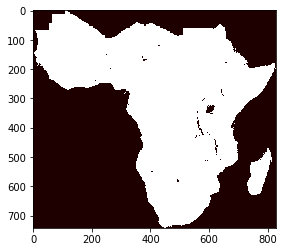

In [23]:
pyplot.imshow(dataset.read(1), cmap='pink')

pyplot.show()